In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

EDA


In [ ]:
raw_mail_data = pd.read_csv('/content/drive/MyDrive/testgmm/mail_data.csv')

In [ ]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
# replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [ ]:
# printing the first 5 rows of the dataframe
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
mail_data.shape

(5572, 2)

In [ ]:
# label spam mail as 0;  ham mail as 1;

mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

spam = 0

ham = 1

In [ ]:
# separating the data as texts and label

X = mail_data['Message']

Y = mail_data['Category']

In [ ]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [ ]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


Percentage of Ham and Spam

In [ ]:
values = raw_mail_data['Category'].value_counts()
total = values.sum()

percentage_ham = (values['ham'] / total) * 100
percentage_spam = (values['spam'] / total) * 100

print('Percentage of ham:', percentage_ham)
print('Percentage of spam:', percentage_spam)


Percentage of ham: 86.59368269921033
Percentage of spam: 13.406317300789663


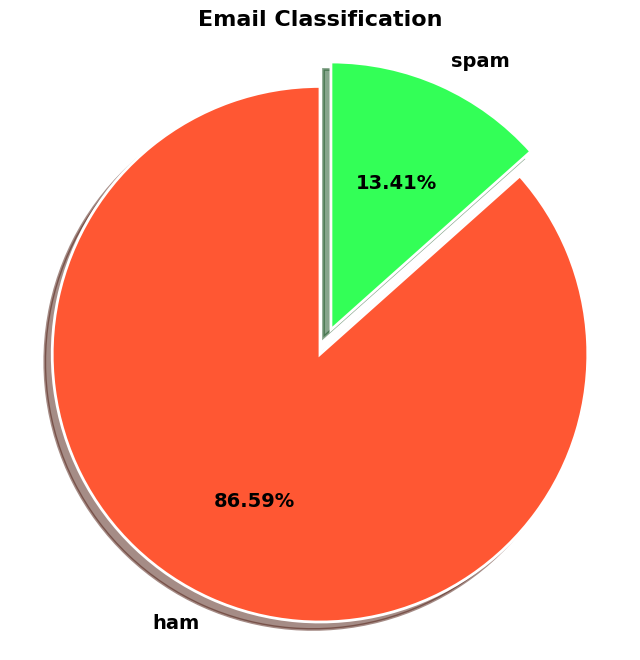

In [ ]:
import matplotlib.pyplot as plt

colors = ['#FF5733', '#33FF57']

explode = (0, 0.1)  # Exploding the second slice (spam) by 10%

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,
    shadow=True
)

for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

ax.set_title('Email Classification', fontsize=16, fontweight='bold')
ax.axis('equal')
plt.show()


Text Length and Structure Analysis



In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download('punkt')

file_path = '/content/drive/MyDrive/testgmm/mail_data.csv'
df = pd.read_csv(file_path)

# Apply the transformations
df['num_characters'] = df['Message'].apply(len)
df['num_words'] = df['Message'].apply(lambda x: len(word_tokenize(x)))
df['num_sentences'] = df['Message'].apply(lambda x: len(sent_tokenize(x)))

df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Category,Message,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.368988,18.826992,2.004666
std,59.926946,13.853616,1.539516
min,2.000000,1.000000,1.000000
25%,35.750000,9.000000,1.000000
50%,61.000000,15.000000,2.000000
75%,122.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


 Character Length Distribution for Legitimate and Spam Messages

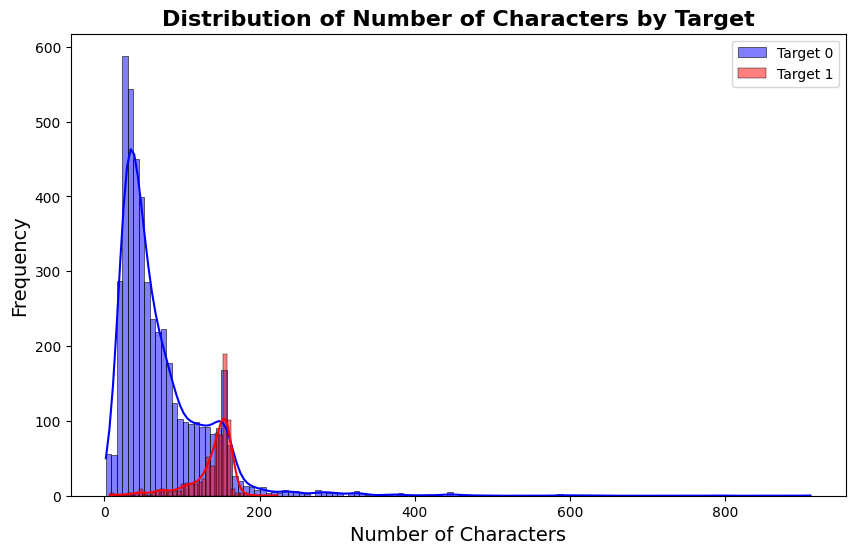

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from textblob import TextBlob

file_path = '/content/drive/MyDrive/testgmm/mail_data.csv'
df = pd.read_csv(file_path)

def word_count(text):
    words = re.findall(r'\b\w+\b', text)
    return len(words)

def sentence_count(text):
    blob = TextBlob(text)
    return len(blob.sentences)

df['num_characters'] = df['Message'].apply(len)
df['num_words'] = df['Message'].apply(word_count)
df['num_sentences'] = df['Message'].apply(sentence_count)

df['target'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

plt.figure(figsize=(10, 6))

sns.histplot(df[df['target'] == 0]['num_characters'], color='blue', label='Target 0', kde=True)

sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='Target 1', kde=True)

plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')
plt.legend()

sns.set(style='whitegrid')
plt.show()

Word Count Distribution for Legitimate and Spam Messages

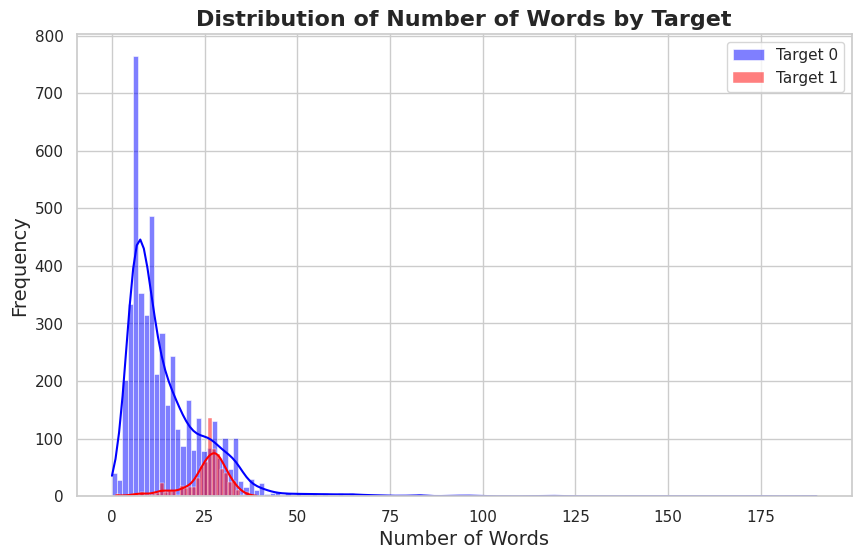

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.histplot(df[df['target'] == 0]['num_words'], color='blue', label='Target 0', kde=True)

sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='Target 1', kde=True)

plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Words by Target', fontsize=16, fontweight='bold')
plt.legend()
sns.set(style='whitegrid')
plt.show()

Pairplot for Data Visualization

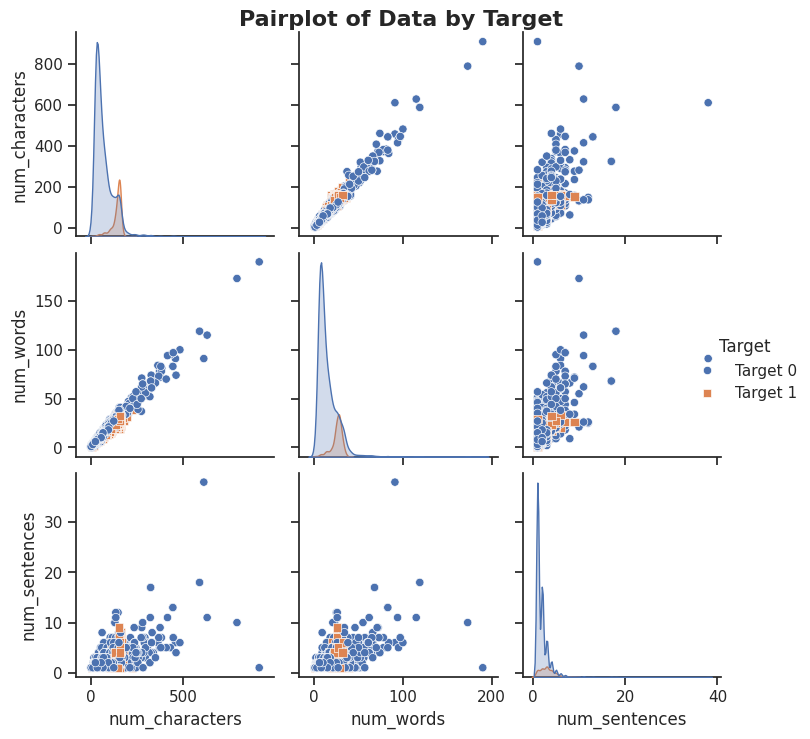

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot with custom styling
sns.set(style='ticks', color_codes=True)
g = sns.pairplot(df, hue='target', diag_kind='kde', markers=["o", "s"])

g.fig.suptitle("Pairplot of Data by Target", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)

g._legend.set_title('Target')
for t, l in zip(g._legend.texts, ["Target 0", "Target 1"]):
    t.set_text(l)

plt.show()

 Coorelation

In [ ]:
df[['target','num_characters', 'num_words', 'num_sentences']].corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.378359,0.305812,0.261938
num_characters,0.378359,1.000000,0.980112,0.630560
num_words,0.305812,0.980112,1.000000,0.611006
num_sentences,0.261938,0.630560,0.611006,1.000000


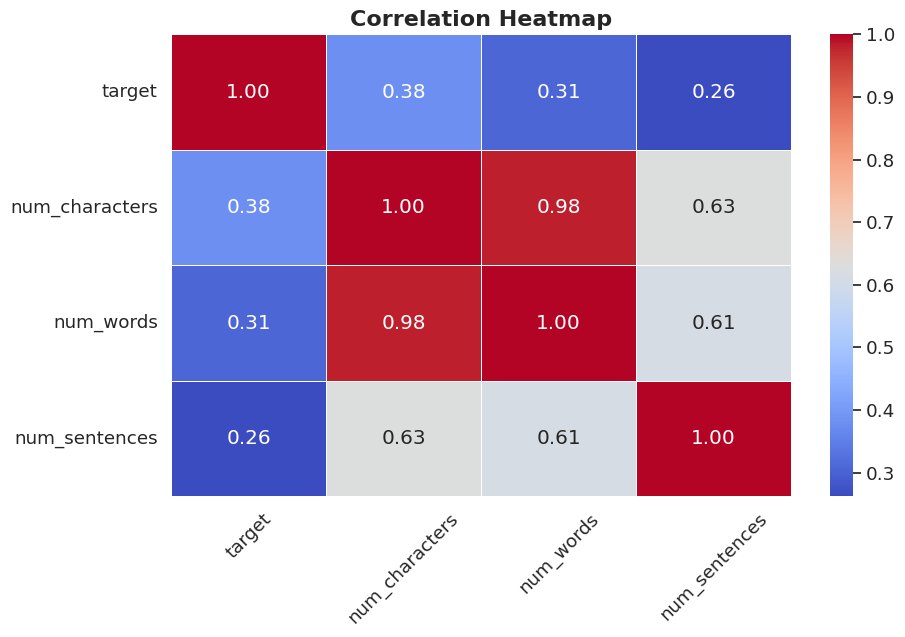

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the correlation matrix
correlation_matrix = df[['target', 'num_characters', 'num_words', 'num_sentences']].corr()

# Create a heatmap with custom styling
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

Word Cloud for Spam Messages

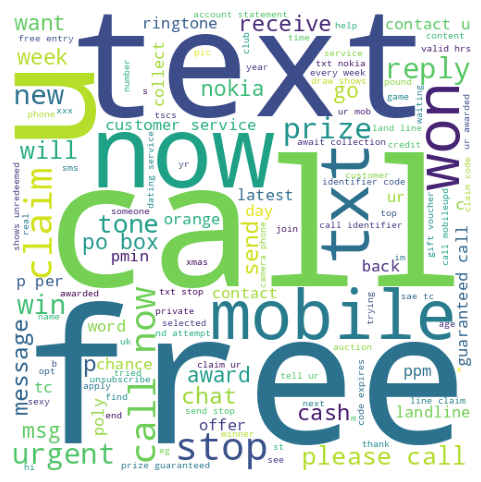

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from textblob import TextBlo

file_path = '/content/drive/MyDrive/testgmm/mail_data.csv'
df = pd.read_csv(file_path)

def word_count(text):
    words = re.findall(r'\b\w+\b', text)
    return len(words)

def sentence_count(text):
    blob = TextBlob(text)
    return len(blob.sentences)

df['num_characters'] = df['Message'].apply(len)
df['num_words'] = df['Message'].apply(word_count)
df['num_sentences'] = df['Message'].apply(sentence_count)

df['target'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

def preprocess_text(text):
    # preprocessing: convert to lowercase and remove non-alphabetic characters
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['transformed_text'] = df['Message'].apply(preprocess_text)

# Generate the WordCloud for spam messages
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)
plt.axis('off')
plt.show()


Word Cloud for ham Messages

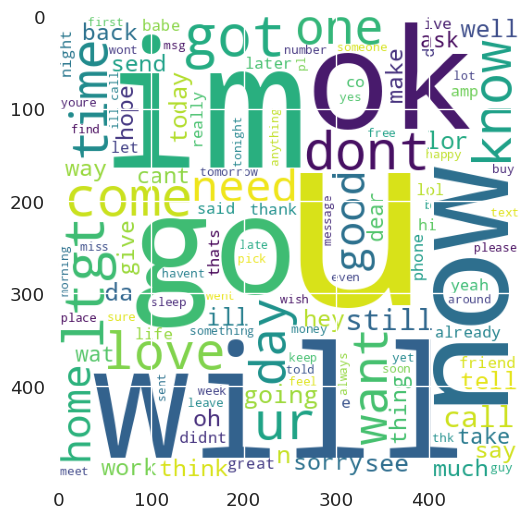

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()

 Find top 30 words of spam


<ipython-input-46-0276696ae321>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')


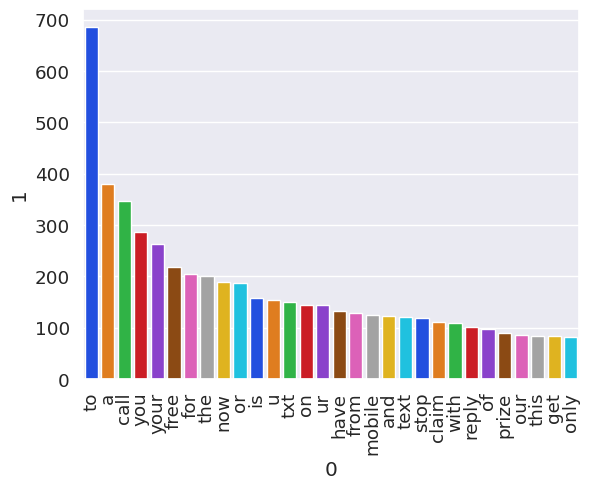

In [ ]:
spam_carpos = []
for sentence in df[df['target'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)

from collections import Counter
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

 Find top 30 words of Not spam Messages

<ipython-input-48-7c9f1c8977fb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')


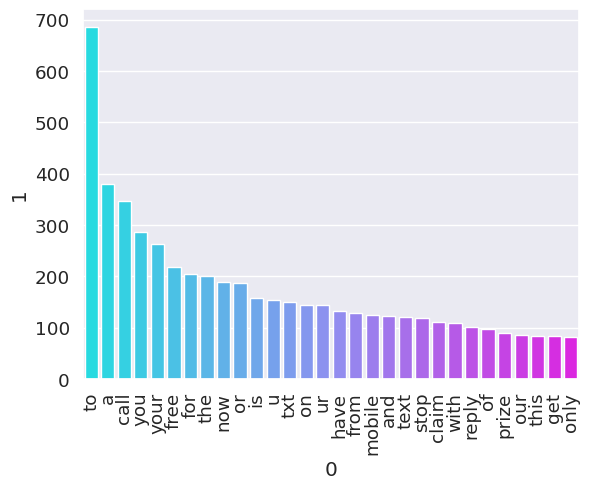

In [ ]:
ham_carpos = []
for sentence in df[df['target'] == 0]['transformed_text'].tolist():
    for word in sentence.split():
        ham_carpos.append(word)

filter_ham_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Correct the lowercase parameter
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

# Transform the text data to feature vectors
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# Convert Y_train and Y_test values to integers
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')


In [ ]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [ ]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

Training the model

Logistic Rregression

In [ ]:
model = LogisticRegression()

In [ ]:
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

Evaluating the trained model

In [ ]:
# prediction on training data

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [ ]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9670181736594121


In [ ]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [ ]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9659192825112107


Accuracy on different models


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming df['Message'] contains the text data and df['Category'] contains the labels
X = df['Message']
Y = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

# Transform text data to feature vectors
vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X = vectorizer.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

svc = SVC(kernel="sigmoid", gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

classifiers = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision


In [ ]:
accuracy_scores = []
precision_scores = []

for name, clf in classifiers.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, Y_train, X_test, Y_test)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)



For:  SVC
Accuracy:  0.9775784753363229
Precision:  0.9924242424242424

For:  KNN
Accuracy:  0.905829596412556
Precision:  1.0

For:  NB
Accuracy:  0.9713004484304932
Precision:  1.0

For:  DT
Accuracy:  0.9246636771300448
Precision:  0.9493670886075949

For:  LR
Accuracy:  0.9533632286995516
Precision:  0.9813084112149533

For:  RF
Accuracy:  0.9739910313901345
Precision:  1.0

For:  Adaboost
Accuracy:  0.9650224215246637
Precision:  0.967741935483871

For:  Bgc
Accuracy:  0.967713004484305
Precision:  0.9343065693430657

For:  ETC
Accuracy:  0.9766816143497757
Precision:  1.0

For:  GBDT
Accuracy:  0.9452914798206278
Precision:  1.0

For:  xgb
Accuracy:  0.9695067264573991
Precision:  0.9618320610687023


Building a Predictive System

In [ ]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail


In [ ]:
input_mail = ["Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030"]
# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[0]
Spam mail


In [ ]:
input_mail = ["07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 08000930705 for delivery tomorrow"]
# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[0]
Spam mail
